## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [ ]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [1]:
!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
To: /content/preprocessed_data.csv
100% 124M/124M [00:00<00:00, 202MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_
To: /content/glove_vectors
100% 128M/128M [00:00<00:00, 195MB/s]


## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [ ]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
input_layer = Input(shape=(n,))
embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [2]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [5]:
# import all the libraries
#make sure that you import your libraries from tf.keras and not just keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.metrics import roc_auc_score
from IPython.display import Image
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
from prettytable import PrettyTable
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OrdinalEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K
%load_ext tensorboard
from sklearn.feature_extraction.text import TfidfVectorizer

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [6]:
df = pd.read_csv('preprocessed_data.csv')

In [ ]:
df.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [7]:
y = df['project_is_approved'].values
X = df.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [8]:
# perform stratified train test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
print("Split ratio")
print('-'*50)
print('Train dataset:',len(X_train)/len(X)*100,'%\n','size:',len(X_train))
print('Test dataset:',len(X_test)/len(X)*100,'%\n','size:',len(X_test))

Split ratio
--------------------------------------------------
Train dataset: 66.99985354422964 %
 size: 73196
Test dataset: 33.000146455770356 %
 size: 36052


## 1.1 Text Vectorization

In [ ]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs

In [9]:
num_words = 1000
oov_token = '<UNK>'
pad_type = 'post'
trunc_type = 'post'

In [10]:
# Tokenize our training data
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(X_train['essay'])

# Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
train_sequences = tokenizer.texts_to_sequences(X_train['essay'])

# Get max training sequence length
maxlen = 300

# Pad the training sequences
train_padded = pad_sequences(train_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

In [11]:
test_sequences = tokenizer.texts_to_sequences(X_test['essay'])
test_padded = pad_sequences(test_sequences, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

In [ ]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [12]:
import pickle
with open('glove_vectors', 'rb') as f:
    glove = pickle.load(f)
    glove_words =  set(glove.keys())

In [13]:
from numpy import zeros
max_vocabulary = len(tokenizer.word_index)
# create a weight matrix for words in training docs
embedding_matrix = zeros((max_vocabulary+1, 300))
for word, i in tokenizer.word_index.items():
  if word in glove_words:
    embedding_vector = glove[word]
    embedding_matrix[i] = embedding_vector

## 1.2 Categorical feature Vectorization

In [ ]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.


In [14]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan)
X_train_school_state=enc.fit_transform(X_train['school_state'].values.reshape(-1,1))
X_test_school_state=enc.fit_transform(X_test['school_state'].values.reshape(-1,1))

In [15]:
no_of_unique_states = X_train['school_state'].nunique()
print("Number of unique school state= ",no_of_unique_states)
embedding_size_school_state = min(np.ceil((no_of_unique_states)/2), 50 )
embedding_size_school_state = int(embedding_size_school_state)
print('Embedding size = ',embedding_size_school_state)

Number of unique school state=  51
Embedding size =  26


In [16]:
X_train_teacher_prefix=enc.fit_transform(X_train['teacher_prefix'].values.reshape(-1,1))
X_test_teacher_prefix=enc.fit_transform(X_test['teacher_prefix'].values.reshape(-1,1))

In [17]:
no_of_unique_teacher_prefix = X_train['teacher_prefix'].nunique()
print("Number of unique teacher_prefix= ",no_of_unique_teacher_prefix)
embedding_size_teacher_prefix = min(np.ceil((no_of_unique_teacher_prefix)/2), 50 )
embedding_size_teacher_prefix = int(embedding_size_teacher_prefix)
print('Embedding size = ',embedding_size_teacher_prefix)

Number of unique teacher_prefix=  5
Embedding size =  3


In [18]:
X_train_clean_categories=enc.fit_transform(X_train['clean_categories'].values.reshape(-1,1))
X_test_clean_categories=enc.fit_transform(X_test['clean_categories'].values.reshape(-1,1))

In [19]:
no_of_unique_clean_categories = X_train['clean_categories'].nunique()
print("Number of unique clean_categories= ",no_of_unique_clean_categories)
embedding_size_clean_categories = min(np.ceil((no_of_unique_clean_categories)/2), 50 )
embedding_size_clean_categories = int(embedding_size_clean_categories)
print('Embedding size = ',embedding_size_clean_categories)

Number of unique clean_categories=  51
Embedding size =  26


In [20]:
X_train_clean_subcategories=enc.fit_transform(X_train['clean_subcategories'].values.reshape(-1,1))
X_test_clean_subcategories=enc.fit_transform(X_test['clean_subcategories'].values.reshape(-1,1))

In [21]:
no_of_unique_clean_subcategories = X_train['clean_subcategories'].nunique()
print("Number of unique clean_subcategories= ",no_of_unique_clean_subcategories)
embedding_size_clean_subcategories = min(np.ceil((no_of_unique_clean_subcategories)/2), 50 )
embedding_size_clean_subcategories = int(embedding_size_clean_subcategories)
print('Embedding size = ',embedding_size_clean_subcategories)

Number of unique clean_subcategories=  383
Embedding size =  50


In [22]:
X_train_project_grade_category=enc.fit_transform(X_train['project_grade_category'].values.reshape(-1,1))
X_test_project_grade_category=enc.fit_transform(X_test['project_grade_category'].values.reshape(-1,1))

In [23]:
no_of_unique_project_grade_category = X_train['project_grade_category'].nunique()
print("Number of unique project_grade_category= ",no_of_unique_project_grade_category)
embedding_size_project_grade_category = min(np.ceil((no_of_unique_project_grade_category)/2), 50 )
embedding_size_project_grade_category = int(embedding_size_project_grade_category)
print('Embedding size = ',embedding_size_project_grade_category)

Number of unique project_grade_category=  4
Embedding size =  2


## 1.3 Numerical feature Vectorization

In [ ]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

In [24]:
from sklearn.preprocessing import StandardScaler
Sscaler=StandardScaler()
Sscaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))


X_train_num_projects=Sscaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_test_num_projects=Sscaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

In [25]:
Sscaler.fit(X_train['price'].values.reshape(-1,1))
X_train_price = Sscaler.transform(X_train['price'].values.reshape(-1,1))
X_test_price = Sscaler.transform(X_test['price'].values.reshape(-1,1))

In [26]:
X_train_numeric_features = np.concatenate((X_train_num_projects , X_train_price) , axis = 1)
X_test_numeric_features= np.concatenate((X_test_num_projects , X_test_price) , axis = 1)
print(X_train_numeric_features.shape ,X_test_numeric_features.shape)

(73196, 2) (36052, 2)


## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

In [ ]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image

In [27]:
essay = tf.keras.Input(shape=(maxlen,), name='essay_input')
X = tf.keras.layers.Embedding(output_dim=maxlen, input_dim=max_vocabulary+1, input_length=maxlen , weights=[embedding_matrix])(essay)
lstm_essay = tf.keras.layers.LSTM(100,recurrent_dropout=0.5,return_sequences=True)(X)
flatten_1 = Flatten()(lstm_essay)

school_state = tf.keras.Input(shape=(1,), name='school_state')
X_school_state = tf.keras.layers.Embedding(no_of_unique_states,embedding_size_school_state, input_length=1)(school_state)
flatten_2 = Flatten()(X_school_state)

teacher_prefix = tf.keras.Input(shape=(1,), name='teacher_prefix')
X_teacher_prefix = tf.keras.layers.Embedding(no_of_unique_teacher_prefix,embedding_size_teacher_prefix, input_length=1)(teacher_prefix)
flatten_3 = Flatten()(X_teacher_prefix)

clean_categories = tf.keras.Input(shape=(1,), name='clean_categories')
X_clean_categories = tf.keras.layers.Embedding(no_of_unique_clean_categories,embedding_size_clean_categories, input_length=1)(clean_categories)
flatten_4 = Flatten()(X_clean_categories)

clean_subcategories = tf.keras.Input(shape=(1,), name='clean_subcategories')
X_clean_subcategories = tf.keras.layers.Embedding(no_of_unique_clean_subcategories,embedding_size_clean_subcategories, input_length=1)(clean_subcategories)
flatten_5 = Flatten()(X_clean_subcategories)

project_grade_category = tf.keras.Input(shape=(1,), name='project_grade_category')
X_project_grade_category = tf.keras.layers.Embedding(no_of_unique_project_grade_category,embedding_size_project_grade_category, input_length=1)(project_grade_category)
flatten_6 = Flatten()(X_project_grade_category)

numeric_features = tf.keras.Input(shape=(2,) , name="numerical_features")
numeric_dense = Dense(256, activation='relu' , kernel_initializer='he_normal')(numeric_features )

X_concat = tf.keras.layers.concatenate([flatten_1 , flatten_2 , flatten_3 ,flatten_4 , flatten_5 , flatten_6 , numeric_dense])
model = Dense(300, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=tf.keras.regularizers.l2(0.001))(X_concat)

model = Dropout(0.5)(model)

model = Dense(200,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer=tf.keras.regularizers.l2(0.001))(model)

model = BatchNormalization()(model)

model = Dropout(0.5)(model)

model = Dense(100,activation="relu", kernel_initializer="glorot_normal" ,kernel_regularizer=tf.keras.regularizers.l2(0.001))(model)


output = Dense(1, activation='sigmoid', name='output')(model)

model_1 = tf.keras.Model(inputs=[essay, school_state ,teacher_prefix,clean_categories,
                       clean_subcategories ,project_grade_category ,numeric_features ],outputs=[output])

print(model_1.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay_input (InputLayer)       [(None, 300)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 300, 300)     14504400    ['essay_input[0][0]']            
                                                                                                  
 school_state (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 teacher_prefix (InputLayer)    [(None, 1)]          0           []                               
                                                                                              

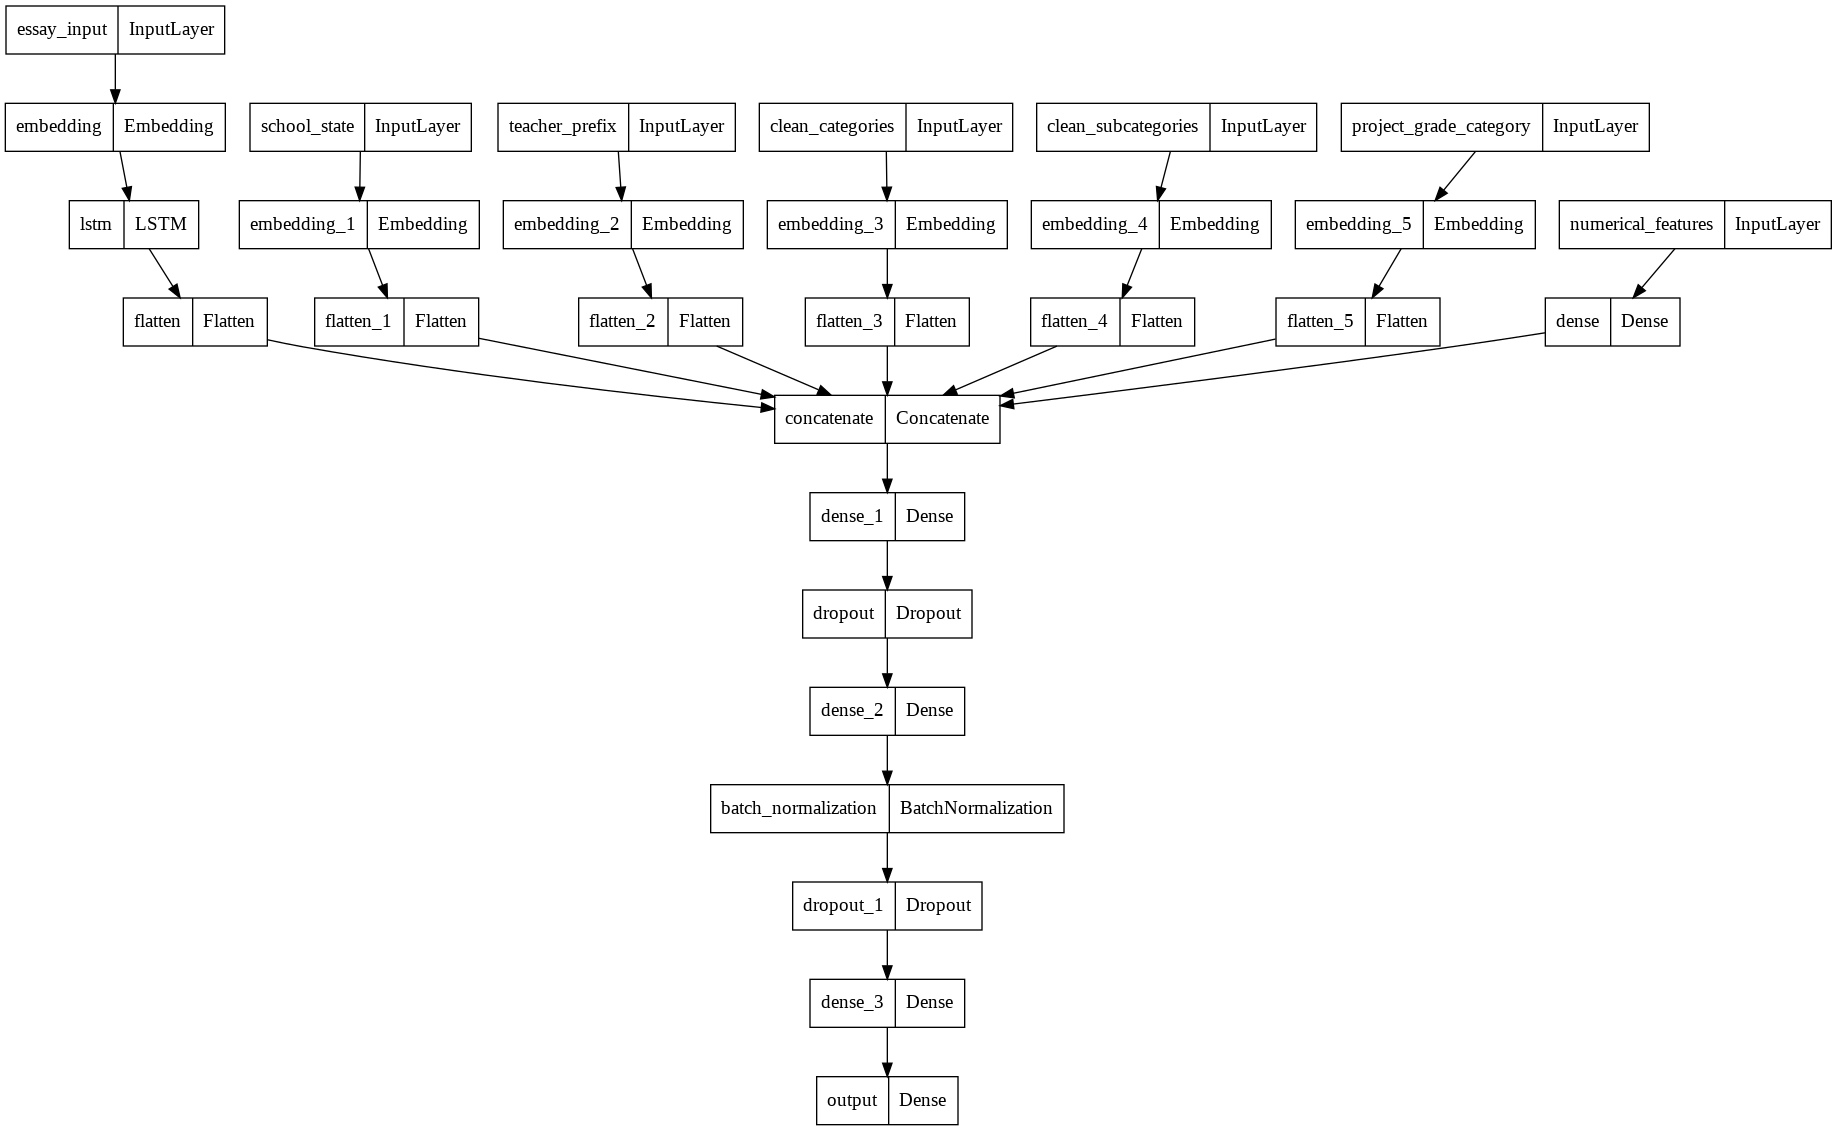

In [28]:
# plot graph
tf.keras.utils.plot_model(model_1, to_file='multilayer_perceptron_graph.png')


In [29]:
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics
def auc_2(y_true, y_pred):
    return tf.numpy_function(metrics.roc_auc_score, (y_true, y_pred), tf.double)

In [30]:
checkpoint1 = ModelCheckpoint("model_1.h5",
                             monitor="auc_2",
                             mode="max",
                             save_best_only = True,
                             verbose=1)
earlystop1 = EarlyStopping(monitor = 'auc_2', 
                            mode="max",
                            min_delta = 0, 
                            patience = 3,
                            verbose = 1)

callbacks_1 = [checkpoint1,earlystop1]

In [31]:
train_all = [train_padded,X_train_school_state,X_train_teacher_prefix,X_train_clean_categories,X_train_clean_subcategories,X_train_project_grade_category,X_train_numeric_features]
test_all = [test_padded,X_test_school_state,X_test_teacher_prefix,X_test_clean_categories,X_test_clean_subcategories,X_test_project_grade_category,X_test_numeric_features]

## 1.5 Compiling and fititng your model

In [ ]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

In [32]:
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=[auc_2])
model_1.fit(train_all,y_train,batch_size = 256, epochs = 2,verbose = 1,callbacks=callbacks_1, validation_data=(test_all,y_test))

Epoch 1/2
286/286 [==============================] - ETA: 0s - loss: 0.8752 - auc_2: 0.6306
Epoch 1: auc_2 improved from -inf to 0.63062, saving model to model_1.h5
286/286 [==============================] - 331s 1s/step - loss: 0.8752 - auc_2: 0.6306 - val_loss: 0.6752 - val_auc_2: 0.7295
Epoch 2/2
286/286 [==============================] - ETA: 0s - loss: 0.5704 - auc_2: 0.7146
Epoch 2: auc_2 improved from 0.63062 to 0.71459, saving model to model_1.h5
286/286 [==============================] - 381s 1s/step - loss: 0.5704 - auc_2: 0.7146 - val_loss: 0.6249 - val_auc_2: 0.7409


# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

Fitting TFIDF vectorizer on train data

In [33]:
vectorizer = TfidfVectorizer(min_df=7)
X = vectorizer.fit_transform(X_train['essay'])
idf = vectorizer.idf_
print(dict(zip(vectorizer.get_feature_names(), idf)))

{'00': 7.1902744214067384, '000': 5.8819416017565604, '03': 10.121468173823159, '05': 10.121468173823159, '10': 4.49205011445582, '100': 3.8156491953475826, '1000': 7.2664357823723025, '100th': 9.256470736336555, '101': 8.64556165401358, '102': 9.428320993263213, '103': 9.156387277779572, '104': 9.428320993263213, '105': 9.561852385887736, '107': 9.716003065714995, '108': 9.803014442704624, '10th': 6.644081653803457, '11': 5.5848445303701775, '110': 7.575936902218723, '1100': 8.905072849498666, '111': 10.121468173823159, '112': 9.716003065714995, '115': 8.905072849498666, '11th': 6.873033546713414, '12': 4.742723558162508, '120': 6.798232333630715, '1200': 8.175558024767845, '123': 9.561852385887736, '123s': 10.121468173823159, '125': 8.057774989111461, '127': 9.898324622508948, '12th': 5.949005832337106, '13': 6.063182661416761, '130': 7.758258459012678, '1300': 9.156387277779572, '133': 9.898324622508948, '135': 9.635960358041459, '13th': 9.492859514400784, '14': 5.8819416017565604, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Box Plot for checking idf vectorizer

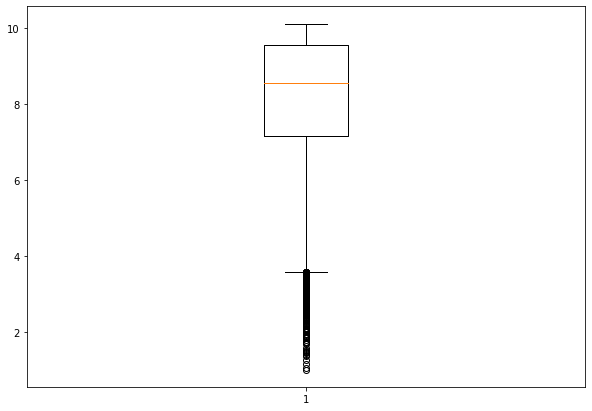

In [34]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(idf)
 
# show plot
plt.show()

We are removing below idf value of 2 and above idf value of 11 words in text data

IDF range for Train data

In [35]:
filtered_indices = np.argwhere(((idf> 2) & (idf<11) ))
filtered_indices = [idx[0] for idx in filtered_indices]

#list of vocabulary from the vectorizer
vocabulary_train = vectorizer.get_feature_names()

#preparing a set with filtered vocabulary
filtered_voc = {vocabulary_train[i] for i in filtered_indices}

#removing the words (which are not in filtered voc) from essays

filtered_text_list_train = []
for text in X_train['essay'].values:
  text_word_list = [word for word in text.split() if word in filtered_voc]
  filtered_text_list_train.append(' '.join(text_word_list))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


IDF range for Test data

In [36]:
filtered_indices = np.argwhere(((idf> 2) & (idf<11) ))
filtered_indices = [idx[0] for idx in filtered_indices]

#list of vocabulary from the vectorizer
vocabulary_test = vectorizer.get_feature_names()

#preparing a set with filtered vocabulary
filtered_voc = {vocabulary_test[i] for i in filtered_indices}

#removing the words (which are not in filtered voc) from essays

filtered_text_list_test = []
for text in X_test['essay'].values:
  text_word_list = [word for word in text.split() if word in filtered_voc]
  filtered_text_list_test.append(' '.join(text_word_list))

In [37]:
# Tokenize our training data
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(filtered_text_list_train)

# Get our training data word index
word_index = tokenizer.word_index

# Encode training data sentences into sequences
train_sequences1 = tokenizer.texts_to_sequences(filtered_text_list_train)

# Get max training sequence length
maxlen = 300

# Pad the training sequences
train_padded1 = pad_sequences(train_sequences1, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

In [38]:
test_sequences1 = tokenizer.texts_to_sequences(filtered_text_list_test)
test_padded1 = pad_sequences(test_sequences1, padding=pad_type, truncating=trunc_type, maxlen=maxlen)

In [39]:
train_all2 = [train_padded1,X_train_school_state,X_train_teacher_prefix,X_train_clean_categories,X_train_clean_subcategories,X_train_project_grade_category,X_train_numeric_features]
test_all2 = [test_padded1,X_test_school_state,X_test_teacher_prefix,X_test_clean_categories,X_test_clean_subcategories,X_test_project_grade_category,X_test_numeric_features]

In [40]:
essay = tf.keras.Input(shape=(maxlen,), name='essay_input')
X = tf.keras.layers.Embedding(output_dim=maxlen, input_dim=max_vocabulary+1, input_length=maxlen, weights=[embedding_matrix])(essay)
lstm_essay = tf.keras.layers.LSTM(100,recurrent_dropout=0.5,return_sequences=True)(X)
flatten_1 = Flatten()(lstm_essay)

school_state = tf.keras.Input(shape=(1,), name='school_state')
X_school_state = tf.keras.layers.Embedding(no_of_unique_states,embedding_size_school_state, input_length=1)(school_state)
flatten_2 = Flatten()(X_school_state)

teacher_prefix = tf.keras.Input(shape=(1,), name='teacher_prefix')
X_teacher_prefix = tf.keras.layers.Embedding(no_of_unique_teacher_prefix,embedding_size_teacher_prefix, input_length=1)(teacher_prefix)
flatten_3 = Flatten()(X_teacher_prefix)

clean_categories = tf.keras.Input(shape=(1,), name='clean_categories')
X_clean_categories = tf.keras.layers.Embedding(no_of_unique_clean_categories,embedding_size_clean_categories, input_length=1)(clean_categories)
flatten_4 = Flatten()(X_clean_categories)

clean_subcategories = tf.keras.Input(shape=(1,), name='clean_subcategories')
X_clean_subcategories = tf.keras.layers.Embedding(no_of_unique_clean_subcategories,embedding_size_clean_subcategories, input_length=1)(clean_subcategories)
flatten_5 = Flatten()(X_clean_subcategories)

project_grade_category = tf.keras.Input(shape=(1,), name='project_grade_category')
X_project_grade_category = tf.keras.layers.Embedding(no_of_unique_project_grade_category,embedding_size_project_grade_category, input_length=1)(project_grade_category)
flatten_6 = Flatten()(X_project_grade_category)

numeric_features = tf.keras.Input(shape=(2,) , name="numerical_features")
numeric_dense = Dense(128, activation='relu' , kernel_initializer='he_normal')(numeric_features )

X_concat = tf.keras.layers.concatenate([flatten_1 , flatten_2 , flatten_3 ,flatten_4 , flatten_5 , flatten_6 , numeric_dense])
model2 = Dense(300, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=tf.keras.regularizers.l2(0.001))(X_concat)

model2 = Dropout(0.5)(model2)

model2 = Dense(200,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer=tf.keras.regularizers.l2(0.001))(model2)

model2 = BatchNormalization()(model2)

model2 = Dropout(0.5)(model2)

model2 = Dense(100,activation="relu", kernel_initializer="glorot_normal" ,kernel_regularizer=tf.keras.regularizers.l2(0.001))(model2)


output = Dense(1, activation='sigmoid', name='output')(model2)

model_2 = tf.keras.Model(inputs=[essay, school_state ,teacher_prefix,clean_categories,
                       clean_subcategories ,project_grade_category ,numeric_features ],outputs=[output])

print(model_2.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay_input (InputLayer)       [(None, 300)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 300, 300)     14504400    ['essay_input[0][0]']            
                                                                                                  
 school_state (InputLayer)      [(None, 1)]          0           []                               
                                                                                                  
 teacher_prefix (InputLayer)    [(None, 1)]          0           []                               
                                                                                            

In [41]:
checkpoint2 = ModelCheckpoint("model_2.h5",
                             monitor="auc_2",
                             mode="max",
                             save_best_only = True,
                             verbose=1)
earlystop2 = EarlyStopping(monitor = 'auc_2', 
                            mode="max",
                            min_delta = 0, 
                            patience = 3,
                            verbose = 1)

callbacks_2 = [checkpoint2,earlystop2]

In [42]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[auc_2])
model_2.fit(train_all2,y_train,batch_size = 256, epochs = 4,verbose = 1,callbacks=callbacks_2, validation_data=(test_all2,y_test))

Epoch 1/4
286/286 [==============================] - ETA: 0s - loss: 0.9114 - auc_2: 0.5836
Epoch 1: auc_2 improved from -inf to 0.58358, saving model to model_2.h5
286/286 [==============================] - 326s 1s/step - loss: 0.9114 - auc_2: 0.5836 - val_loss: 0.6525 - val_auc_2: 0.7064
Epoch 2/4
286/286 [==============================] - ETA: 0s - loss: 0.5780 - auc_2: 0.6995
Epoch 2: auc_2 improved from 0.58358 to 0.69951, saving model to model_2.h5
286/286 [==============================] - 320s 1s/step - loss: 0.5780 - auc_2: 0.6995 - val_loss: 0.5341 - val_auc_2: 0.7242
Epoch 3/4
286/286 [==============================] - ETA: 0s - loss: 0.5036 - auc_2: 0.7243
Epoch 3: auc_2 improved from 0.69951 to 0.72430, saving model to model_2.h5
286/286 [==============================] - 320s 1s/step - loss: 0.5036 - auc_2: 0.7243 - val_loss: 0.4846 - val_auc_2: 0.7341
Epoch 4/4
286/286 [==============================] - ETA: 0s - loss: 0.4642 - auc_2: 0.7349
Epoch 4: auc_2 improved from 

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [ ]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of categorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.

One hot encoding categorical features

In [43]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)
x_train_state_one_hot = vectorizer.transform(X_train['school_state'].values)
x_test_state_one_hot = vectorizer.transform(X_test['school_state'].values)
print(x_train_state_one_hot.shape, y_train.shape)
print(x_test_state_one_hot.shape, y_test.shape)

(73196, 51) (73196,)
(36052, 51) (36052,)


In [44]:
vectorizer.fit(X_train['teacher_prefix'].values)
x_train_teacher_prefix_one_hot = vectorizer.transform(X_train['teacher_prefix'].values)
x_test_teacher_prefix_one_hot = vectorizer.transform(X_test['teacher_prefix'].values)
print(x_train_teacher_prefix_one_hot.shape, y_train.shape)
print(x_test_teacher_prefix_one_hot.shape, y_test.shape)

(73196, 5) (73196,)
(36052, 5) (36052,)


In [45]:
vectorizer.fit(X_train['clean_categories'].values)
x_train_categories_one_hot = vectorizer.transform(X_train['clean_categories'].values)
x_test_categories_one_hot = vectorizer.transform(X_test['clean_categories'].values)
print(x_train_categories_one_hot.shape, y_train.shape)
print(x_test_categories_one_hot.shape, y_test.shape)

(73196, 9) (73196,)
(36052, 9) (36052,)


In [46]:
vectorizer.fit(X_train['clean_subcategories'].values)
x_train_subcategories_one_hot = vectorizer.transform(X_train['clean_subcategories'].values)
x_test_subcategories_one_hot = vectorizer.transform(X_test['clean_subcategories'].values)
print(x_train_subcategories_one_hot.shape, y_train.shape)
print(x_test_subcategories_one_hot.shape, y_test.shape)

(73196, 30) (73196,)
(36052, 30) (36052,)


In [47]:
vectorizer.fit(X_train['project_grade_category'].values)
x_train_project_grade_one_hot = vectorizer.transform(X_train['project_grade_category'].values)
x_test_project_grade_one_hot = vectorizer.transform(X_test['project_grade_category'].values)
print(x_train_project_grade_one_hot.shape, y_train.shape)
print(x_test_project_grade_one_hot.shape, y_test.shape)

(73196, 4) (73196,)
(36052, 4) (36052,)


Horizontal stack all categorical features

In [48]:
train_features= hstack((x_train_project_grade_one_hot,x_train_teacher_prefix_one_hot,x_train_categories_one_hot,x_train_subcategories_one_hot,x_train_state_one_hot,X_train_price,X_train_num_projects)).todense()
test_features = hstack((x_test_project_grade_one_hot,x_test_teacher_prefix_one_hot,x_test_categories_one_hot,x_test_subcategories_one_hot,x_test_state_one_hot,X_test_price,X_test_num_projects)).todense()

In [49]:
print(train_features.shape)
print(test_features.shape)

(73196, 101)
(36052, 101)


In [50]:
pad_length_conv=101

Expanding dimenstions to apply convolutions

In [51]:
train_conv = np.expand_dims(train_features,2)
test_conv = np.expand_dims(test_features,2)

In [52]:
essay = tf.keras.Input(shape=(maxlen,), name='essay_input')
X = tf.keras.layers.Embedding(output_dim=maxlen, input_dim=max_vocabulary+1, input_length=maxlen , weights=[embedding_matrix])(essay)
lstm_essay = tf.keras.layers.LSTM(100,recurrent_dropout=0.5,return_sequences=True)(X)
flatten_1 = Flatten()(lstm_essay)

Input_conv  = tf.keras.Input(shape=(pad_length_conv,1), name='conv_input')
conv1 = tf.keras.layers.Conv1D(200,10,activation='relu',kernel_initializer='glorot_uniform',padding='valid')(Input_conv)
conv2 = tf.keras.layers.Conv1D(100,10,activation='relu',kernel_initializer='he_normal',padding='valid')(conv1)
flatten_2 = Flatten()(conv2)
x_concat = tf.keras.layers.concatenate([flatten_1 , flatten_2])
x = Dense(150,activation="relu", kernel_initializer="he_normal",kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_concat)
x=Dropout(0.5)(x)
x = Dense(200,activation="sigmoid",kernel_initializer="glorot_normal" ,kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x=Dropout(0.5)(x)
x = Dense(100,activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
output = Dense(1, activation='sigmoid', name='output')(x)
model_3= tf.keras.Model(inputs=[essay, Input_conv],outputs=[output])
print(model_3.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 essay_input (InputLayer)       [(None, 300)]        0           []                               
                                                                                                  
 conv_input (InputLayer)        [(None, 101, 1)]     0           []                               
                                                                                                  
 embedding_12 (Embedding)       (None, 300, 300)     14504400    ['essay_input[0][0]']            
                                                                                                  
 conv1d (Conv1D)                (None, 92, 200)      2200        ['conv_input[0][0]']             
                                                                                            

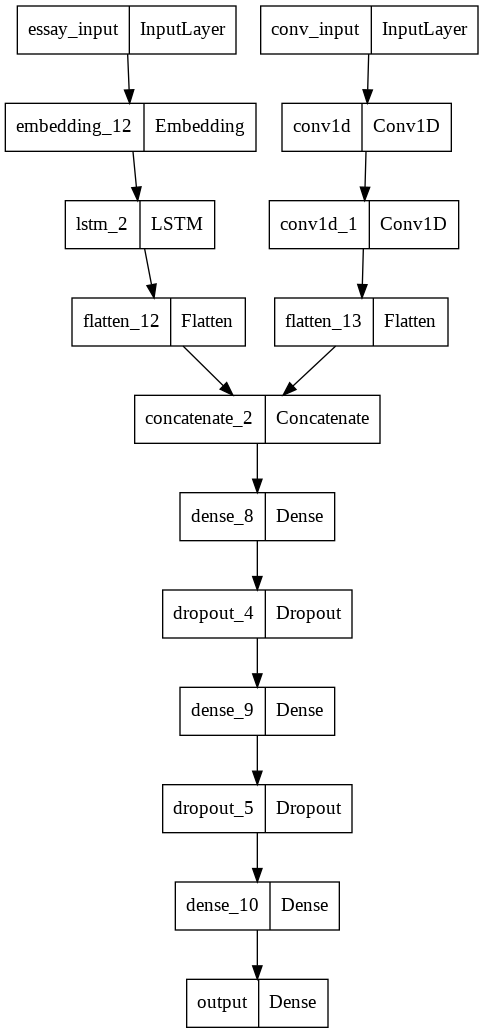

In [53]:
# plot graph
tf.keras.utils.plot_model(model_3, to_file='LSTM_and_Conv.png')

In [59]:
checkpoint3 = ModelCheckpoint("model_3.h5",
                             monitor="auc_2",
                             mode="max",
                             save_best_only = True,
                             verbose=1)
earlystop3 = EarlyStopping(monitor = 'auc_2', 
                            mode="max",
                            min_delta = 0, 
                            patience = 3,
                            verbose = 1)

callbacks_3 = [checkpoint3,earlystop3]

In [56]:
train_3=[train_padded,train_features]
test_3=[test_padded,test_features]

In [60]:
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=[auc_2])
model_3.fit(train_3,y_train, batch_size=256, epochs=5, verbose=1,callbacks=callbacks_3, validation_data=(test_3, y_test))

Epoch 1/5
286/286 [==============================] - ETA: 0s - loss: 0.3915 - auc_2: 0.7567
Epoch 1: auc_2 improved from -inf to 0.75673, saving model to model_3.h5
286/286 [==============================] - 314s 1s/step - loss: 0.3915 - auc_2: 0.7567 - val_loss: 0.3921 - val_auc_2: 0.7547
Epoch 2/5
286/286 [==============================] - ETA: 0s - loss: 0.3848 - auc_2: 0.7664
Epoch 2: auc_2 improved from 0.75673 to 0.76635, saving model to model_3.h5
286/286 [==============================] - 311s 1s/step - loss: 0.3848 - auc_2: 0.7664 - val_loss: 0.3908 - val_auc_2: 0.7542
Epoch 3/5
286/286 [==============================] - ETA: 0s - loss: 0.3783 - auc_2: 0.7728
Epoch 3: auc_2 improved from 0.76635 to 0.77284, saving model to model_3.h5
286/286 [==============================] - 311s 1s/step - loss: 0.3783 - auc_2: 0.7728 - val_loss: 0.3950 - val_auc_2: 0.7474
Epoch 4/5
286/286 [==============================] - ETA: 0s - loss: 0.3731 - auc_2: 0.7784
Epoch 4: auc_2 improved from 

Observations:

1.In model-1 we have trained LSTM on essay text data and applied ordinal encoder to categorical features,standardized numerical features and checked AUC score which we get around 74%.

2.In model-2 we applied TFIDF vectorizer on train data and removed IDF values below 2 and greater than 11 words in both test and train data and performed remaining part same as model-1 and checked auc score which we got around 73%.

3.In model-3 we applied convolution to horizontal stacked categorical data with LSTM to text essay data and checked auc score we got around 75%.